<a href="https://colab.research.google.com/github/AntonioWh1te/The-Journey/blob/main/Phase%204%3A%20Data_Preparation_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

# FMP API Key
apikey = getpass.getpass("Enter your FMP API Key Here: ")

# Define Assets and Range
assets = ['SMH', 'SPY', 'NVDA', 'TSM']
start = '2015-01-01'
end = '2025-01-01'

# Function to fetch historical data from FMP
def get_historical_data(symbol, start, end, apikey):
  url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start}&to={end}&apikey={apikey}"
  response = requests.get(url)
  data = response.json()

  # Check if 'historical' key exists, otherwise print the error message
  if 'historical' in data:
    df = pd.DataFrame(data['historical'])
    df['date'] = pd.to_datetime(df['date']) # convert 'date' column to datetime
    df.set_index('date', inplace=True) # Set 'date as the index
    return df
  else:
    print(f"Error: 'historical' key not found in data for {symbol}. Response: {data}")
    return None  # or raise an exception if preferred

# Fetch data for each asset
data = {}
for asset in assets:
  data[asset] = get_historical_data(asset, start, end, apikey)

# Check if data was successfully fetched before proceeding
# Change: Use all() with a list comprehension to check for None values
if all([value is not None for value in data.values()]):
  all_data = pd.concat(data.values(), keys=data.keys(), axis=1)
  all_data.head()
  all_data.info()
  all_data.describe()
else:
  print("Data fetching failed for one or more assets. Please check the error messages.")

Enter your FMP API Key Here: ··········
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2024-12-31 to 2015-01-02
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (SMH, open)               2516 non-null   float64
 1   (SMH, high)               2516 non-null   float64
 2   (SMH, low)                2516 non-null   float64
 3   (SMH, close)              2516 non-null   float64
 4   (SMH, adjClose)           2516 non-null   float64
 5   (SMH, volume)             2516 non-null   int64  
 6   (SMH, unadjustedVolume)   2516 non-null   int64  
 7   (SMH, change)             2516 non-null   float64
 8   (SMH, changePercent)      2516 non-null   float64
 9   (SMH, vwap)               2516 non-null   float64
 10  (SMH, label)              2516 non-null   object 
 11  (SMH, changeOverTime)     2516 non-null   float64
 12  (SPY, open)               2516 non-null   float64
 13  (SPY,

Enter your FMP API Key Here: ··········


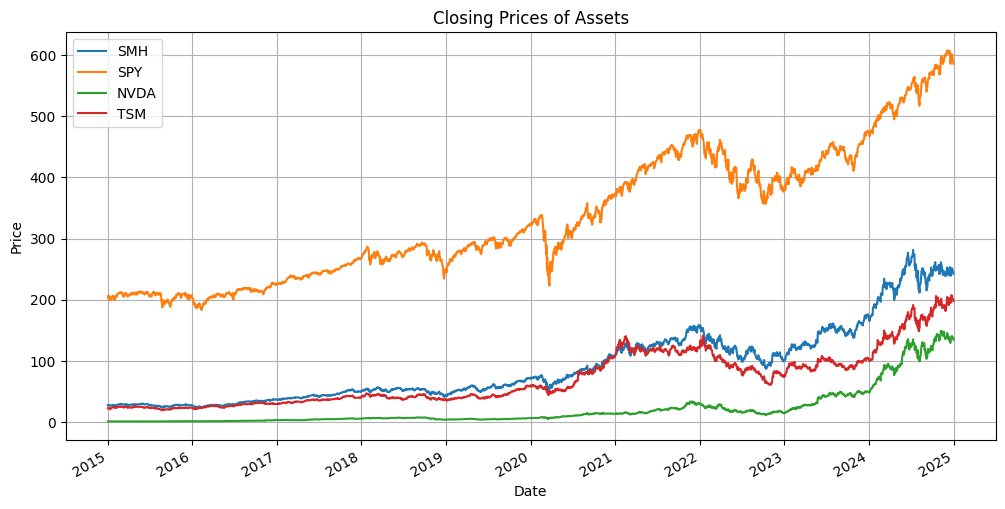

In [7]:
import pandas as pd
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

# FMP API Key
apikey = getpass.getpass("Enter your FMP API Key Here: ")

# Define Assets and Range
assets = ['SMH', 'SPY', 'NVDA', 'TSM']
start = '2015-01-01'
end = '2025-01-01'

# Function to fetch historical data from FMP
def get_historical_data(symbol, start, end, apikey):
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start}&to={end}&apikey={apikey}"
    response = requests.get(url)
    data = response.json()

    # Check if 'historical' key exists, otherwise print the error message
    if 'historical' in data:
        df = pd.DataFrame(data['historical'])
        df['date'] = pd.to_datetime(df['date'])  # convert 'date' column to datetime
        df.set_index('date', inplace=True)  # Set 'date as the index
        return df
    else:
        print(
            f"Error: 'historical' key not found in data for {symbol}. Response: {data}"
        )
        return None  # or raise an exception if preferred


# Fetch data for each asset
data = {}
for asset in assets:
    data[asset] = get_historical_data(asset, start, end, apikey)

# Check if data was successfully fetched before proceeding
# Change: Use all() with a list comprehension to check for None values
if all([value is not None for value in data.values()]):
    all_data = pd.concat(data.values(), keys=data.keys(), axis=1)
    # Select the 'close' column for each asset
    close_prices = all_data.loc[:, (slice(None), 'close')]
    # Drop the second level of the column index (the 'close' label)
    close_prices.columns = close_prices.columns.droplevel(1)
    # Plot the closing prices
    close_prices.plot(figsize=(12, 6))  # Adjust figsize as needed
    plt.title('Closing Prices of Assets')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()  # Display the plot
else:
    print(
        "Data fetching failed for one or more assets. Please check the error messages."
    )